### Laboratorio. Árboles y random forest para regresión y clasificación
### **Nombres:**  Ponce Proaño Miguel Alejandro 
### **Asignatura:**  Aprendizaje Automático
### **Actividad:** Nro. 1 - mia05_t6_act

### 1. Importar los datos del USA Housing Dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [20]:
df_base=pd.read_csv("housing_train.csv")
display(df_base)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Tratamiento de missing. Si existen valores faltantes, decidir si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique su respuesta. 

### Tratamiento missing variables numericas

In [2]:
datos_numericos = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_var_numericas = df_base.select_dtypes(include=datos_numericos).copy()
col_total_nulos = df_var_numericas.isnull().sum()
serie_col_nombres = col_total_nulos[col_total_nulos > 0]
display(serie_col_nombres.keys())

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Se actualiza por la media de los datos

In [4]:
for columna in serie_col_nombres.keys():
        mean_col=np.mean(df_var_numericas[columna])
        df_var_numericas[columna].replace(np.nan, mean_col, inplace=True)   
display('Verificacion actualizacion datos',df_var_numericas.isnull().sum().max())

'Verificacion actualizacion datos'

0

### Tratamiento missing variables no numericas

In [5]:
df_var_no_numericas = df_base[df_base.columns.difference(df_var_numericas.columns)].copy()
total_no_numericas = df_var_no_numericas.isna().sum()
max_factor_moda = len(df_var_no_numericas)*0.8
msk_max_fac_moda = total_no_numericas>max_factor_moda

In [6]:
df_cols_max_factor = total_no_numericas[msk_max_fac_moda]
for columna in df_cols_max_factor.keys():
    df_var_no_numericas[columna].replace(np.nan, 'NoAsginado', inplace=True)
display('Verificacion actualizacion datos',df_var_no_numericas.isnull().sum().max())

'Verificacion actualizacion datos'

690

In [7]:
df_cols_min_factor=total_no_numericas[~msk_max_fac_moda]
for columna in df_cols_min_factor.keys():
    val_mediana = df_var_no_numericas[columna].value_counts().idxmax()
    df_var_no_numericas[columna].replace(np.nan, val_mediana, inplace=True)
display('Verificacion actualizacion datos',df_var_no_numericas.isnull().sum().max())
display(df_var_no_numericas)

'Verificacion actualizacion datos'

0

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NoAsginado,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NoAsginado,CollgCr,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
1,NoAsginado,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NoAsginado,Veenker,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
2,NoAsginado,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NoAsginado,CollgCr,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
3,NoAsginado,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NoAsginado,Crawfor,Y,NoAsginado,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NoAsginado,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NoAsginado,NoRidge,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NoAsginado,1Fam,TA,No,Unf,Unf,Gd,Y,Norm,Norm,...,NoAsginado,Gilbert,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
1456,NoAsginado,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,...,NoAsginado,NWAmes,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
1457,NoAsginado,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,...,Shed,Crawfor,Y,NoAsginado,CompShg,Gable,Normal,WD,Pave,AllPub
1458,NoAsginado,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,...,NoAsginado,NAmes,Y,NoAsginado,CompShg,Hip,Normal,WD,Pave,AllPub


### Para cada categoria se agrega un codigo que la identifica(variable ficticia)

In [8]:
encoder = preprocessing.LabelEncoder()
df_encoder=df_var_no_numericas.apply(encoder.fit_transform)
df_encoder=df_encoder.add_suffix("_c")
df_categorias_encoder=pd.concat([df_var_no_numericas,df_encoder],axis=1)
display(df_categorias_encoder)

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature_c,Neighborhood_c,PavedDrive_c,PoolQC_c,RoofMatl_c,RoofStyle_c,SaleCondition_c,SaleType_c,Street_c,Utilities_c
0,NoAsginado,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,1,5,2,3,1,1,4,8,1,0
1,NoAsginado,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,1,24,2,3,1,1,4,8,1,0
2,NoAsginado,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,1,5,2,3,1,1,4,8,1,0
3,NoAsginado,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,1,6,2,3,1,1,0,8,1,0
4,NoAsginado,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,1,15,2,3,1,1,4,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NoAsginado,1Fam,TA,No,Unf,Unf,Gd,Y,Norm,Norm,...,1,8,2,3,1,1,4,8,1,0
1456,NoAsginado,1Fam,TA,No,ALQ,Rec,Gd,Y,Norm,Norm,...,1,14,2,3,1,1,4,8,1,0
1457,NoAsginado,1Fam,Gd,No,GLQ,Unf,TA,Y,Norm,Norm,...,3,6,2,3,1,1,4,8,1,0
1458,NoAsginado,1Fam,TA,Mn,GLQ,Rec,TA,Y,Norm,Norm,...,1,12,2,3,1,3,4,8,1,0


### 2. De las variables numéricas hallar el valor mínimo, el máximo, la mediana y la media.

#### Para seleccionar los tipos de datos numéricos se escoje los tipos que los decribren en una lista, luego se utiliza el método describe(), en donde el percentíl 50% equivale a la mediana de los datos.

In [9]:
display(df_var_numericas.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3. De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 

###	De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 

In [10]:
for columna in df_var_no_numericas.columns:
    df_frec_cols=df_categorias_encoder[[columna,columna+"_c"]]
    df_frecuencia_cat=df_frec_cols.groupby([columna,columna+"_c"],1043141111111111111=False).size()    
    display(df_frecuencia_cat)

Alley       Alley_c
Grvl        0            50
NoAsginado  1          1369
Pave        2            41
dtype: int64

BldgType  BldgType_c
1Fam      0             1220
2fmCon    1               31
Duplex    2               52
Twnhs     3               43
TwnhsE    4              114
dtype: int64

BsmtCond  BsmtCond_c
Fa        0               45
Gd        1               65
Po        2                2
TA        3             1348
dtype: int64

BsmtExposure  BsmtExposure_c
Av            0                 221
Gd            1                 134
Mn            2                 114
No            3                 991
dtype: int64

BsmtFinType1  BsmtFinType1_c
ALQ           0                 220
BLQ           1                 148
GLQ           2                 418
LwQ           3                  74
Rec           4                 133
Unf           5                 467
dtype: int64

BsmtFinType2  BsmtFinType2_c
ALQ           0                   19
BLQ           1                   33
GLQ           2                   14
LwQ           3                   46
Rec           4                   54
Unf           5                 1294
dtype: int64

BsmtQual  BsmtQual_c
Ex        0             121
Fa        1              35
Gd        2             618
TA        3             686
dtype: int64

CentralAir  CentralAir_c
N           0                 95
Y           1               1365
dtype: int64

Condition1  Condition1_c
Artery      0                 48
Feedr       1                 81
Norm        2               1260
PosA        3                  8
PosN        4                 19
RRAe        5                 11
RRAn        6                 26
RRNe        7                  2
RRNn        8                  5
dtype: int64

Condition2  Condition2_c
Artery      0                  2
Feedr       1                  6
Norm        2               1445
PosA        3                  1
PosN        4                  2
RRAe        5                  1
RRAn        6                  1
RRNn        7                  2
dtype: int64

Electrical  Electrical_c
FuseA       0                 94
FuseF       1                 27
FuseP       2                  3
Mix         3                  1
SBrkr       4               1335
dtype: int64

ExterCond  ExterCond_c
Ex         0                 3
Fa         1                28
Gd         2               146
Po         3                 1
TA         4              1282
dtype: int64

ExterQual  ExterQual_c
Ex         0               52
Fa         1               14
Gd         2              488
TA         3              906
dtype: int64

Exterior1st  Exterior1st_c
AsbShng      0                 20
AsphShn      1                  1
BrkComm      2                  2
BrkFace      3                 50
CBlock       4                  1
CemntBd      5                 61
HdBoard      6                222
ImStucc      7                  1
MetalSd      8                220
Plywood      9                108
Stone        10                 2
Stucco       11                25
VinylSd      12               515
Wd Sdng      13               206
WdShing      14                26
dtype: int64

Exterior2nd  Exterior2nd_c
AsbShng      0                 20
AsphShn      1                  3
Brk Cmn      2                  7
BrkFace      3                 25
CBlock       4                  1
CmentBd      5                 60
HdBoard      6                207
ImStucc      7                 10
MetalSd      8                214
Other        9                  1
Plywood      10               142
Stone        11                 5
Stucco       12                26
VinylSd      13               504
Wd Sdng      14               197
Wd Shng      15                38
dtype: int64

Fence       Fence_c
GdPrv       0            59
GdWo        1            54
MnPrv       2           157
MnWw        3            11
NoAsginado  4          1179
dtype: int64

FireplaceQu  FireplaceQu_c
Ex           0                  24
Fa           1                  33
Gd           2                1070
Po           3                  20
TA           4                 313
dtype: int64

Foundation  Foundation_c
BrkTil      0               146
CBlock      1               634
PConc       2               647
Slab        3                24
Stone       4                 6
Wood        5                 3
dtype: int64

Functional  Functional_c
Maj1        0                 14
Maj2        1                  5
Min1        2                 31
Min2        3                 34
Mod         4                 15
Sev         5                  1
Typ         6               1360
dtype: int64

GarageCond  GarageCond_c
Ex          0                  2
Fa          1                 35
Gd          2                  9
Po          3                  7
TA          4               1407
dtype: int64

GarageFinish  GarageFinish_c
Fin           0                 352
RFn           1                 422
Unf           2                 686
dtype: int64

GarageQual  GarageQual_c
Ex          0                  3
Fa          1                 48
Gd          2                 14
Po          3                  3
TA          4               1392
dtype: int64

GarageType  GarageType_c
2Types      0                 6
Attchd      1               951
Basment     2                19
BuiltIn     3                88
CarPort     4                 9
Detchd      5               387
dtype: int64

Heating  Heating_c
Floor    0               1
GasA     1            1428
GasW     2              18
Grav     3               7
OthW     4               2
Wall     5               4
dtype: int64

HeatingQC  HeatingQC_c
Ex         0              741
Fa         1               49
Gd         2              241
Po         3                1
TA         4              428
dtype: int64

HouseStyle  HouseStyle_c
1.5Fin      0               154
1.5Unf      1                14
1Story      2               726
2.5Fin      3                 8
2.5Unf      4                11
2Story      5               445
SFoyer      6                37
SLvl        7                65
dtype: int64

KitchenQual  KitchenQual_c
Ex           0                100
Fa           1                 39
Gd           2                586
TA           3                735
dtype: int64

LandContour  LandContour_c
Bnk          0                  63
HLS          1                  50
Low          2                  36
Lvl          3                1311
dtype: int64

LandSlope  LandSlope_c
Gtl        0              1382
Mod        1                65
Sev        2                13
dtype: int64

LotConfig  LotConfig_c
Corner     0               263
CulDSac    1                94
FR2        2                47
FR3        3                 4
Inside     4              1052
dtype: int64

LotShape  LotShape_c
IR1       0             484
IR2       1              41
IR3       2              10
Reg       3             925
dtype: int64

MSZoning  MSZoning_c
C (all)   0               10
FV        1               65
RH        2               16
RL        3             1151
RM        4              218
dtype: int64

MasVnrType  MasVnrType_c
BrkCmn      0                15
BrkFace     1               445
None        2               872
Stone       3               128
dtype: int64

MiscFeature  MiscFeature_c
Gar2         0                   2
NoAsginado   1                1406
Othr         2                   2
Shed         3                  49
TenC         4                   1
dtype: int64

Neighborhood  Neighborhood_c
Blmngtn       0                  17
Blueste       1                   2
BrDale        2                  16
BrkSide       3                  58
ClearCr       4                  28
CollgCr       5                 150
Crawfor       6                  51
Edwards       7                 100
Gilbert       8                  79
IDOTRR        9                  37
MeadowV       10                 17
Mitchel       11                 49
NAmes         12                225
NPkVill       13                  9
NWAmes        14                 73
NoRidge       15                 41
NridgHt       16                 77
OldTown       17                113
SWISU         18                 25
Sawyer        19                 74
SawyerW       20                 59
Somerst       21                 86
StoneBr       22                 25
Timber        23                 38
Veenker       24                 11
dtype: int64

PavedDrive  PavedDrive_c
N           0                 90
P           1                 30
Y           2               1340
dtype: int64

PoolQC      PoolQC_c
Ex          0              2
Fa          1              2
Gd          2              3
NoAsginado  3           1453
dtype: int64

RoofMatl  RoofMatl_c
ClyTile   0                1
CompShg   1             1434
Membran   2                1
Metal     3                1
Roll      4                1
Tar&Grv   5               11
WdShake   6                5
WdShngl   7                6
dtype: int64

RoofStyle  RoofStyle_c
Flat       0                13
Gable      1              1141
Gambrel    2                11
Hip        3               286
Mansard    4                 7
Shed       5                 2
dtype: int64

SaleCondition  SaleCondition_c
Abnorml        0                   101
AdjLand        1                     4
Alloca         2                    12
Family         3                    20
Normal         4                  1198
Partial        5                   125
dtype: int64

SaleType  SaleType_c
COD       0               43
CWD       1                4
Con       2                2
ConLD     3                9
ConLI     4                5
ConLw     5                5
New       6              122
Oth       7                3
WD        8             1267
dtype: int64

Street  Street_c
Grvl    0              6
Pave    1           1454
dtype: int64

Utilities  Utilities_c
AllPub     0              1459
NoSeWa     1                 1
dtype: int64

###	Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos

In [11]:
display(df_var_numericas.corr())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### Determinar el conjunto de modelización y el de validación

In [22]:
df_data = pd.concat([df_var_numericas,df_encoder],axis=1)
display(df_data)
df_data.drop(['Id'], axis=1)
columnas_x=df_data.columns.difference(['SalePrice'])
X=df_data[columnas_x]
Y=df_data['SalePrice']

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscFeature_c,Neighborhood_c,PavedDrive_c,PoolQC_c,RoofMatl_c,RoofStyle_c,SaleCondition_c,SaleType_c,Street_c,Utilities_c
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,5,2,3,1,1,4,8,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,24,2,3,1,1,4,8,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,5,2,3,1,1,4,8,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,6,2,3,1,1,0,8,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,15,2,3,1,1,4,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1,8,2,3,1,1,4,8,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1,14,2,3,1,1,4,8,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,3,6,2,3,1,1,4,8,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,1,12,2,3,1,3,4,8,1,0


In [13]:
semilla_aleatoria = 1234
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

### Regresión método de Árboles 

In [60]:
reg_arboles = DecisionTreeRegressor(max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, 
            random_state=semilla_aleatoria, splitter='best')
reg_arboles.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1538259045, splitter='best')

### Predicción del modelo

In [61]:
predEY_reg_arb=reg_arboles.predict(test_x)

### Métricas

In [65]:
print('MAE',mean_absolute_error(test_y,predEY_reg_arb))
print('MSE',mean_squared_error(test_y,predEY_reg_arb))
print('R2', r2_score(test_y,predEY_reg_arb))

MAE 24023.3253850679
MSE 1263792308.4080389
R2 0.769909959889443


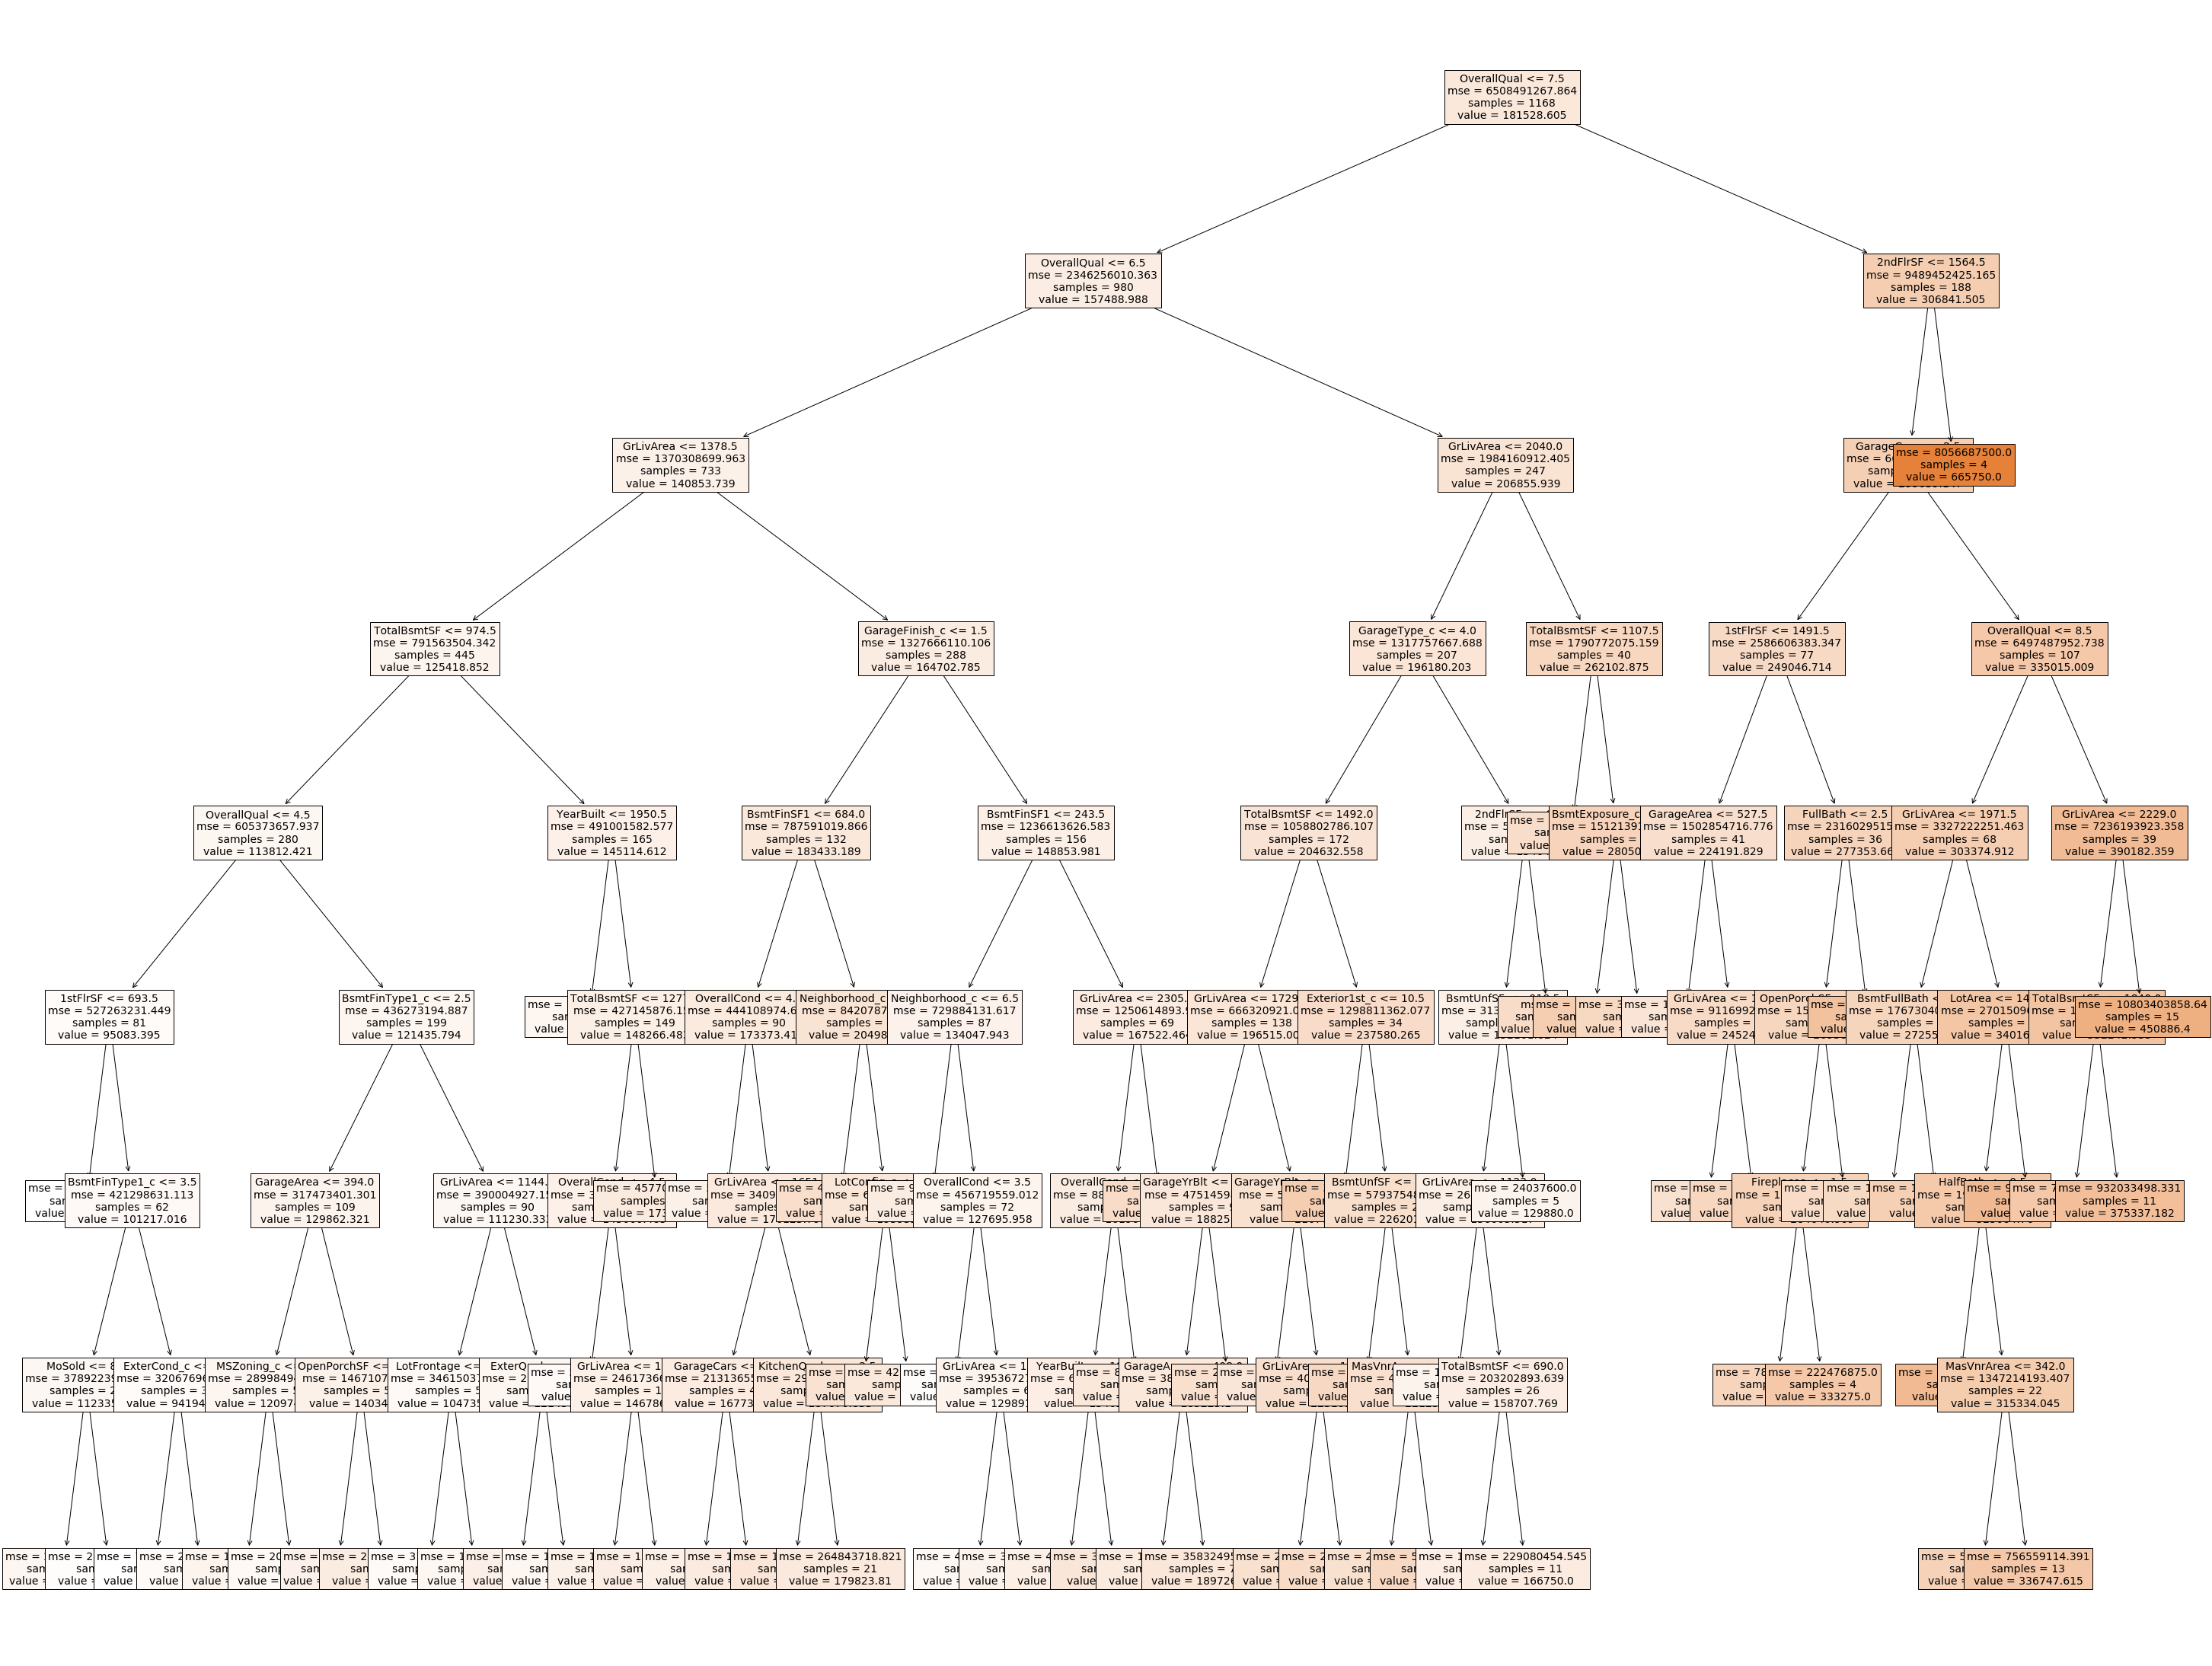

### Regresión método Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
reg_rndforest = RandomForestRegressor(n_estimators=100)
reg_rndforest.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Predicción del modelo

In [72]:
predEY_reg_rfor=reg_rndforest.predict(test_x)

### Métricas

In [73]:
print('MAE',mean_absolute_error(test_y,predEY_reg_rfor))
print('MSE',mean_squared_error(test_y,predEY_reg_rfor))
print('R2', r2_score(test_y,predEY_reg_rfor))

MAE 17745.201438356165
MSE 754278233.5835958
R2 0.8626737100193403


In [ ]:
plt.figure(figsize=(50,40))
a = plot_tree(reg_arboles, 
              feature_names=columnas_x,               
              filled=True, 
              rounded=True, 
              fontsize=14)

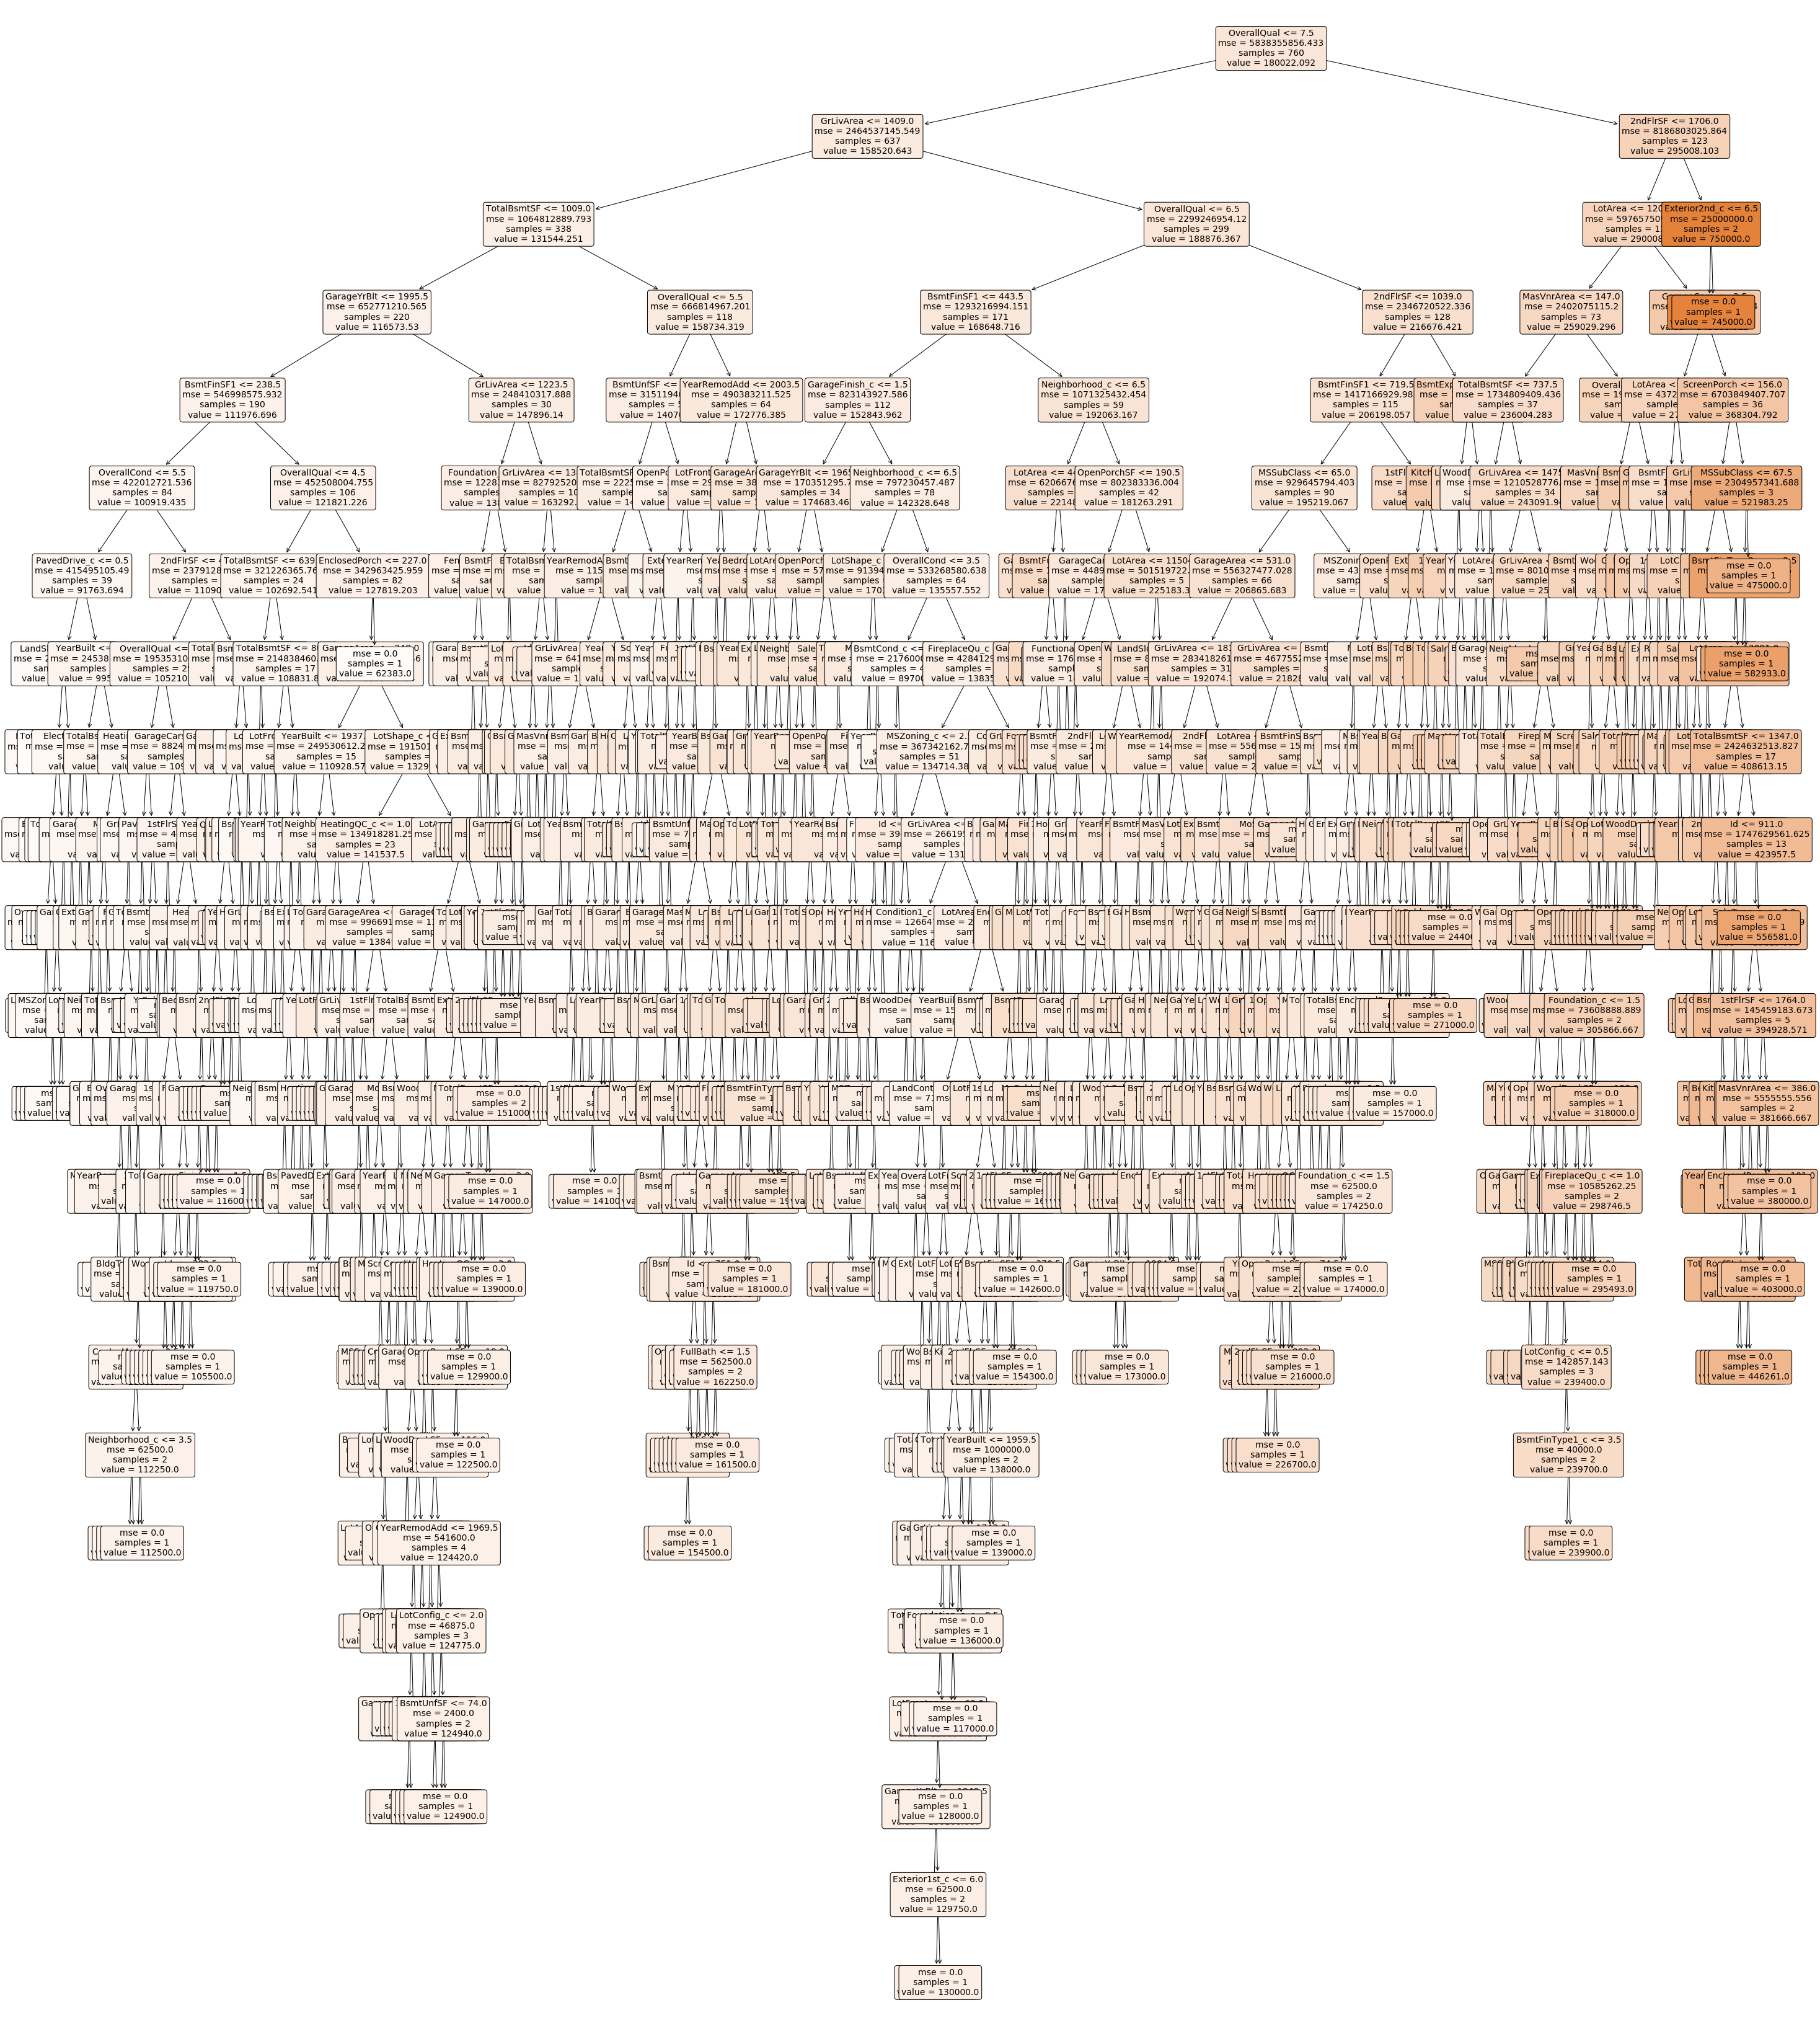

In [74]:
plt.figure(figsize=(50,60))
a = plot_tree(reg_rndforest.estimators_[1], 
              feature_names=columnas_x,               
              filled=True, 
              rounded=True, 
              fontsize=14)

In [45]:
export_graphviz(estimatores, 
                out_file='tree.dot', 
                feature_names = columnas_x,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

ModuleNotFoundError: No module named 'graphviz'

ModuleNotFoundError: No module named 'pydotplus'